In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/Housing.csv')

In [ ]:
data.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
data.shape

(545, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

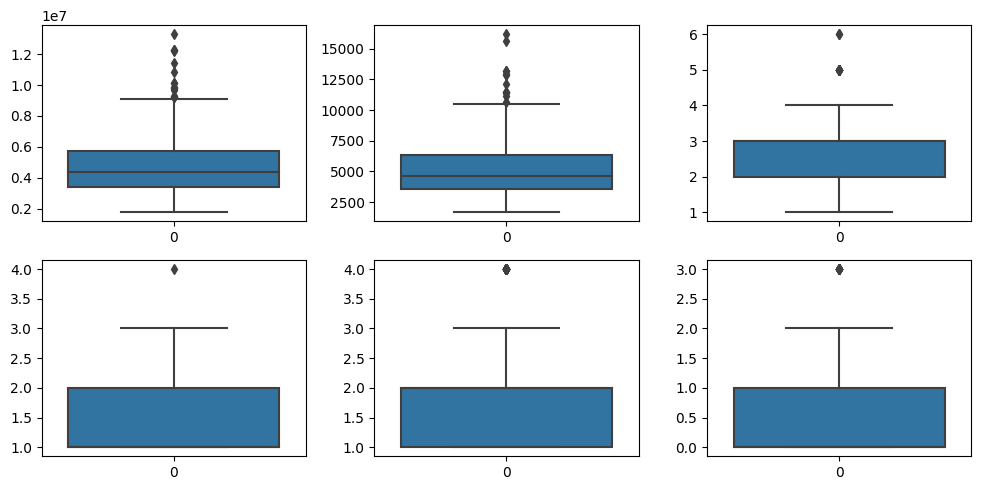

In [ ]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(data['price'], ax = axs[0,0])
plt2 = sns.boxplot(data['area'], ax = axs[0,1])
plt3 = sns.boxplot(data['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(data['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(data['stories'], ax = axs[1,1])
plt3 = sns.boxplot(data['parking'], ax = axs[1,2])

plt.tight_layout()

{'whiskers': [<matplotlib.lines.Line2D at 0x7d309be67820>,
 'caps': [<matplotlib.lines.Line2D at 0x7d309be66f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d309be64a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7d309be67be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d309be675e0>],
 'means': []}

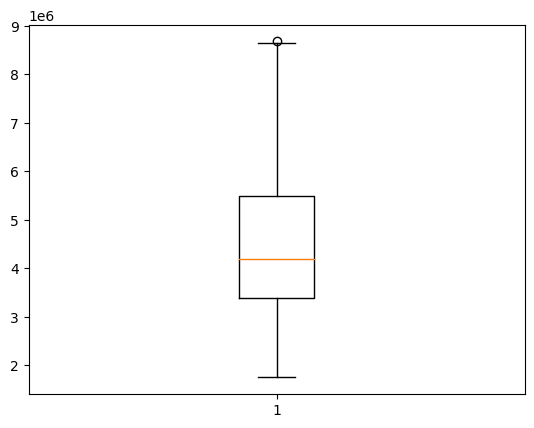

In [ ]:
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.price >= Q1 - 1.5*IQR) & (data.price <= Q3 + 1.5*IQR)]
plt.boxplot(data.price)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d309be39cf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d309be3bb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d309be39a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7d309be3aec0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d309be3b430>],
 'means': []}

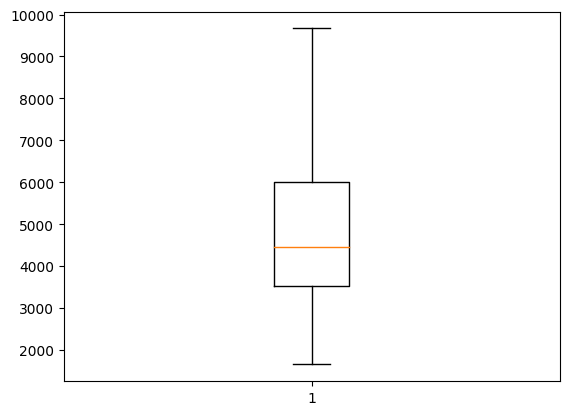

In [ ]:
Q1 = data.area.quantile(0.25)
Q3 = data.area.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.area >= Q1 - 1.5*IQR) & (data.area <= Q3 + 1.5*IQR)]
plt.boxplot(data.area)

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

In [ ]:
X = pd.get_dummies(X , drop_first = True)
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
21,7155,3,2,1,2,1,1,1,0,1,0,0,1
22,8050,3,1,1,1,1,1,1,0,1,0,0,0
23,4560,3,2,2,1,1,1,1,0,1,0,0,0
24,8800,3,2,2,2,1,0,0,0,1,0,0,0
25,6540,4,2,2,2,1,1,1,0,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error on Training Data:', mse_train)

Mean Squared Error on Training Data: 738459739440.129


In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error on Test Data:', mse_test)

Mean Squared Error on Test Data: 878537160529.6855


In [ ]:
# Calculate R-squared for the training data
r2_train = r2_score(y_train, y_train_pred)
print('R-squared on Training Data:', r2_train)

# Calculate R-squared for the test data
r2_test = r2_score(y_test, y_test_pred)
print('R-squared on Test Data:', r2_test)

R-squared on Training Data: 0.6695145709372786
R-squared on Test Data: 0.6933575590284289


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
ridge_model = Ridge(alpha=1.0)  # You can adjust alpha
ridge_model.fit(X_train_poly, y_train)

Ridge()

Ridge()

In [ ]:
# Evaluate Ridge model
y_train_pred_ridge = ridge_model.predict(X_train_poly)
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

y_test_pred_ridge = ridge_model.predict(X_test_poly)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

In [ ]:
print("\nRidge Regression Model (with Polynomial Features):")
print("MSE Train:", mse_train_ridge)
print("R-squared Train:", r2_train_ridge)
print("MSE Test:", mse_test_ridge)
print("R-squared Test:", r2_test_ridge)



Ridge Regression Model (with Polynomial Features):
MSE Train: 524712877836.03705
R-squared Train: 0.7651734396544752
MSE Test: 858546033691.5493
R-squared Test: 0.7003352125721019


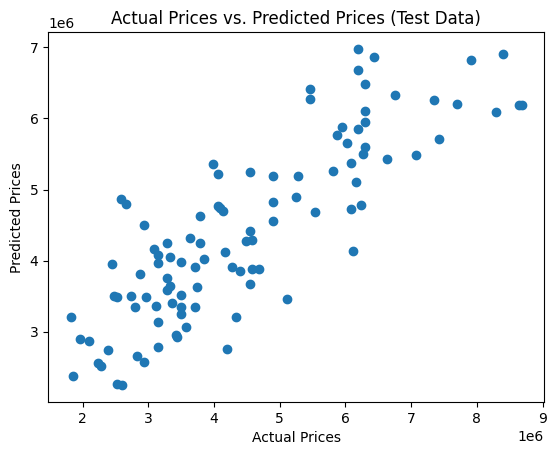

Predicted Price: 6837777.714640024

Random Forest Model Predicted Price: 6880510.0
Ridge Model Predicted Price: 7484218.996106531


In [ ]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Test Data)')
plt.show()
new_data = [[6600,4,	2,	2,	1,	1,	1,	1,	0,	1,	1,	0,	1]]
predicted_price = model.predict(new_data)
print("Predicted Price:", predicted_price[0])

# Predict on new data using Ridge model
new_data_poly = poly.transform(new_data)
predicted_price_ridge = ridge_model.predict(new_data_poly)
print("Ridge Model Predicted Price:", predicted_price_ridge[0])